<img src="credits3.png" style="width:95%;">

<h1 style="color:#0e535b; text-align: left">BancoUno - Machine Learning modeado y pruebas</h1>

<p style="text-align:justify">En este notebook se realizarán labores de modelado y testeo de Machine Learning del caso cuyo propósito final será intentar predecir la probabilidad de cumplimiento de pago de los clientes que tienen un crédito en el Banco Uno.</p>


<h3 style="color:#0e535b; text-align: left">1. Preparando los datos para Machine Learning</h3>

<h4 style="color:#0e535b; text-align: left">1.1 Carga de Liberías y DataFrame</h4>

<p style="text-align:justify">Se utilizarán librerías que permiten analizar los datos (Pandas y Numpy) y generar informe graficos y visualización de los datos así como para Análisis de Componentes Principales.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [2]:
credit = pd.read_excel("credit.xlsx")
credit.drop(['Unnamed: 0'], axis=1,inplace=True)
credit.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


<h4 style="color:#0e535b; text-align: left">1.2 Codificación de los datos</h4>

<p style="text-align:justify">La variable Y, en este caso corresponde a la probabilidad de cumplimiento de pago está definida como una variable categórica discreta de la siguiente forma:</p>
<ul>
    <li>Not Default</li>
    <li>Default</li>
</ul>

<p style="text-align:justify">La variable SEX corresponde a una variable categórica discreta de la siguiente forma:</p>
<ul>
    <li>female = 0</li>
    <li>male = 1</li>
</ul>

<p style="text-align:justify">La variable EDUCATION corresponde a una variable categórica discreta de la siguiente forma:</p>
<ul>
    <li>graduate school = 0</li>
    <li>high school = 1</li>
    <li>other = 2</li>
    <li>university = 3</li>
</ul>

<p style="text-align:justify">Ambas variables independientes se consideran de impacto para el modelo, por lo que se procederá a codificarlas de forma numérica:</p>

In [3]:
credit["SEX"]=encoder.fit_transform(credit.SEX.values)
credit["EDUCATION"]=encoder.fit_transform(credit.EDUCATION.values)
credit.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,0,3,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,0,3,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,0,3,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,0,3,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,1,3,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


<h4 style="color:#0e535b; text-align: left">1.3 Transformación de los datos</h4>

<p style="text-align:justify">La transformación de los datos para su utilización en la selección de componentes implica delimitar las variables independientes que se van a analizar (X) y la variable objetivo (Y):</p>
<p style="text-align:justify" >*Para incluir la variable de sexo convertida solo se agregará 'SEX_female' ya que está muy correlacionada con 'SEX_male'.</p>


In [4]:
variablesInd = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
             'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
            'PAY_AMT5', 'PAY_AMT6']
X = credit.loc[:, variablesInd].values
Y = credit.loc[:,['default payment next month (Y)']].values

<h4 style="color:#0e535b; text-align: left">1.4 Reescalado de los datos</h4>

<p style="text-align:justify">En el DataFrame se observa que las variables tienen atributos muy diferentes, es por esto que se procederá a realizar un reescalado de las variables para obtener nuevos valores entre 0 y 1:</p>

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
reescaladoX = MinMaxScaler().fit_transform(X)
set_printoptions(precision=3)
print(reescaladoX[0:5,:])

[[0.01  0.    1.    0.056 0.4   0.444 0.111 0.111 0.    0.    0.019 0.028
  0.019 0.009 0.03  0.261 0.    0.002 0.    0.    0.    0.   ]
 [0.111 0.    1.    0.093 0.1   0.444 0.222 0.222 0.222 0.4   0.017 0.026
  0.022 0.012 0.033 0.263 0.    0.004 0.001 0.005 0.    0.004]
 [0.081 0.    1.    0.241 0.2   0.222 0.222 0.222 0.222 0.2   0.045 0.038
  0.042 0.025 0.045 0.273 0.006 0.005 0.001 0.005 0.003 0.009]
 [0.04  0.    1.    0.296 0.2   0.222 0.222 0.222 0.222 0.2   0.063 0.072
  0.106 0.04  0.06  0.284 0.008 0.007 0.001 0.005 0.003 0.002]
 [0.04  1.    1.    0.667 0.1   0.222 0.111 0.222 0.222 0.2   0.023 0.03
  0.082 0.032 0.05  0.276 0.008 0.129 0.011 0.044 0.002 0.001]]


<h3 style="color:#0e535b; text-align: left">2. Selección de características</h3>

<h4 style="color:#0e535b; text-align: left">2.1 Análisis de componentes principales PCA</h4>

<p style="text-align:justify">Para el caso actual se aplicará PCA. Se procederá a correr el PCA con las variables reescaladas para obtener tres componentes principales.</p>

In [6]:
# extracción de componentes
pca = PCA(n_components=2)
fit = pca.fit(reescaladoX)

# summarize components
print(f"Varianzas Explicadas: {fit.explained_variance_ratio_}")
print(fit.components_)

Varianzas Explicadas: [0.377 0.324]
[[ 9.934e-03  9.573e-01 -2.841e-01  4.765e-02  1.231e-03  4.902e-03
   4.374e-03  1.306e-03  4.646e-03  2.833e-03  9.505e-03  7.461e-03
   1.222e-02  7.783e-03  6.152e-03  4.957e-03 -2.496e-05  1.636e-03
   4.906e-04  1.434e-03  4.752e-03  1.969e-03]
 [-5.500e-02  2.795e-01  9.461e-01  3.102e-03  4.619e-02  7.867e-02
   7.011e-02  6.411e-02  5.613e-02  5.212e-02  1.005e-02  8.530e-03
   1.403e-02  7.215e-03  6.883e-03  5.103e-03 -5.987e-03 -6.402e-03
  -1.900e-03 -2.845e-04 -3.143e-03 -9.484e-04]]


<h4 style="color:#0e535b; text-align: left">2.2 Definición del DataFrame final</h4>

<p style="text-align:justify">El DataFrame final toma como nuevas variables independientes los componentes principales y los une a la variable independiente Y que se viene manejando en el proyecto.</p>

In [7]:
componentesPrincipales = pca.fit_transform(reescaladoX)
dataFrame_final = pd.DataFrame(data = componentesPrincipales, columns = ['pc_1', 'pc_2'])

In [8]:
objetivo = pd.DataFrame(data = Y, columns = ['Y'])

In [9]:
dataFrame_final = pd.concat([dataFrame_final, objetivo], axis = 1)

dataFrame_final.head(10)

,pc_1,pc_2,Y
0,-0.558551,0.347564,default
1,-0.553254,0.376573,default
2,-0.547196,0.356219,not default
3,-0.543487,0.360233,not default
4,0.429936,0.626369,not default
5,0.698144,-0.306102,not default
6,0.719501,-0.308808,not default
7,-0.558958,0.332439,not default
8,-0.361922,-0.262352,not default
9,0.595505,-0.059917,not default


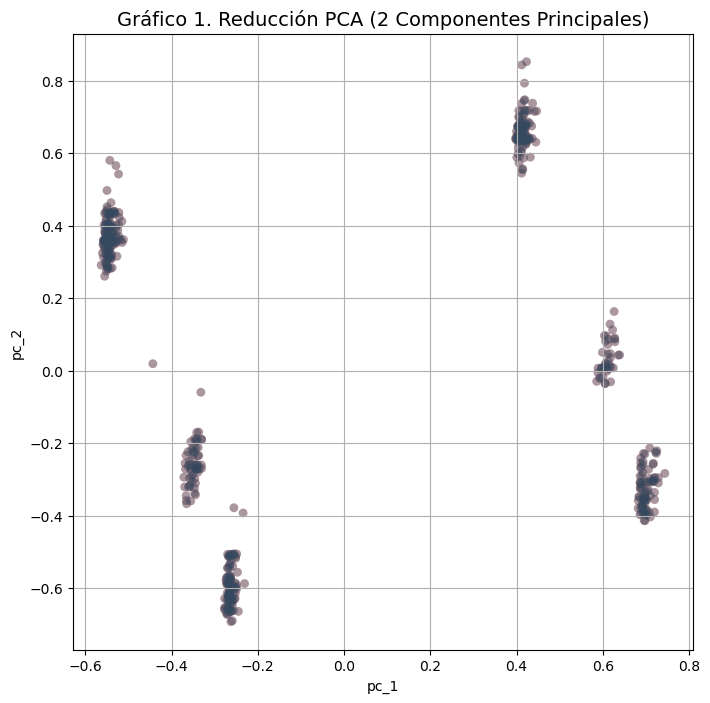

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('pc_1', fontsize = 10)
ax.set_ylabel('pc_2', fontsize = 10)
ax.set_title('Gráfico 1. Reducción PCA (2 Componentes Principales)', fontsize = 14)

targets = dataFrame_final["Y"]
colors = ['#F08080','#34495E']

for target, color in zip(targets,colors):
    indicesToKeep = dataFrame_final['Y'] == target
    ax.scatter(dataFrame_final.loc[indicesToKeep, 'pc_1']
               , dataFrame_final.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 40
               ,alpha=0.40
               ,edgecolors='none')
ax.grid()

<h3 style="color:#0e535b; text-align: left">3. Selección de un modelo de Machine Learning</h3>

<h4 style="color:#0e535b; text-align: left">3.1 Regresión Lineal Simple o Múltiple</h4>

<p style="text-align:justify">Para el caso en estudio no se recomienda la implementación de un modelo de regresión lineal simple o múltiple por varias razones:</p>
<ul>
    <li>No existe una relación lineal entre las variables independiente y la variable independiente.</li>
    <li>Los modelos de regresión lineales son sensibles a los valores atípicos, y pueden brindar datos inexactos.</li>
    <li>La variable objetivo es de tipo categórica, y el modelo de regresión lineal requiere disponer de la variable dependiente en dominio numérico y consecutivo.</li>
</ul>

<h5 style="color:#0e535b; text-align: left">3.1.1 Regresión Lineal Simple o Múltiple - visualización de variables</h5>

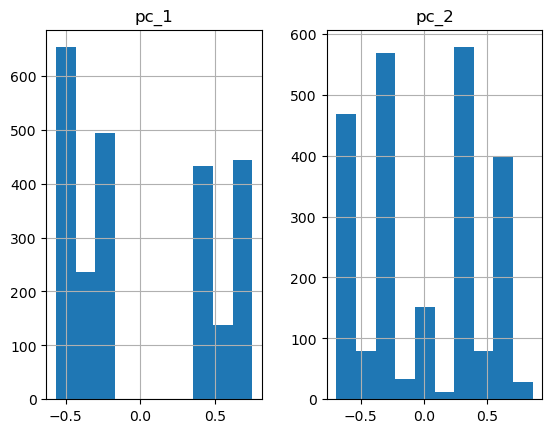

In [11]:
viz = dataFrame_final[['pc_1','pc_2','Y']]
viz.hist()
plt.show()

<p style="text-align:justify">La visualización anterior nos permite comprobar dos puntos importantes:</p>
<ul>
    <li>Los mínimos y máximos de cada varuable se distribuyen muy ampliamente por el rango.</li>
    <li>La mayor densidad de registros se encuentra en los extremos del rango, alejados del 0 en ambas variables.</li>
</ul>

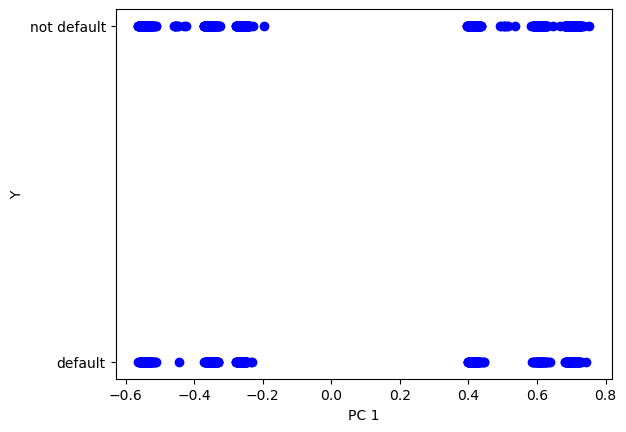

In [17]:
plt.scatter(dataFrame_final.pc_1, dataFrame_final.Y,  color='blue')
plt.xlabel("PC 1")
plt.ylabel("Y")
plt.show()

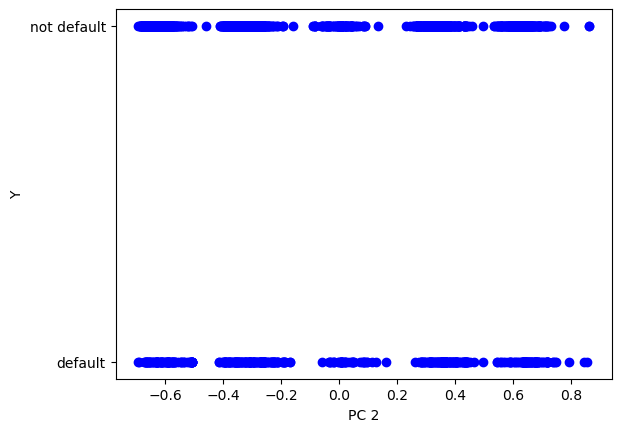

In [16]:
plt.scatter(dataFrame_final.pc_2, dataFrame_final.Y,  color='blue')
plt.xlabel("PC 2")
plt.ylabel("Y")
plt.show()

<p style="text-align:justify">En base ea las visualización anteriores se evidencia que la distribución de la variable dependiente no permitirá realizar un modelado de tipo Regresión Lineal Simple o Regresión Lineal Múltiple que permita predecir el comportamiento de pago de los deudores.</p>